=== Basic Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2023-01-01 to 2023-01-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       31 non-null     int64  
 1   min_temp       31 non-null     int64  
 2   precipitation  31 non-null     float64
 3   humidity       31 non-null     int64  
 4   wind_speed     31 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.5 KB
None

=== Descriptive Statistics ===
        max_temp   min_temp  precipitation   humidity  wind_speed
count  31.000000  31.000000      31.000000  31.000000   31.000000
mean   14.935484   6.741935       0.154839  70.193548    9.451613
std     3.632588   3.366182       0.289642   7.743468    3.462549
min     8.000000   0.000000       0.000000  55.000000    3.000000
25%    12.000000   4.500000       0.000000  65.000000    7.500000
50%    15.000000   7.000000       0.000000  70.000000   10.0

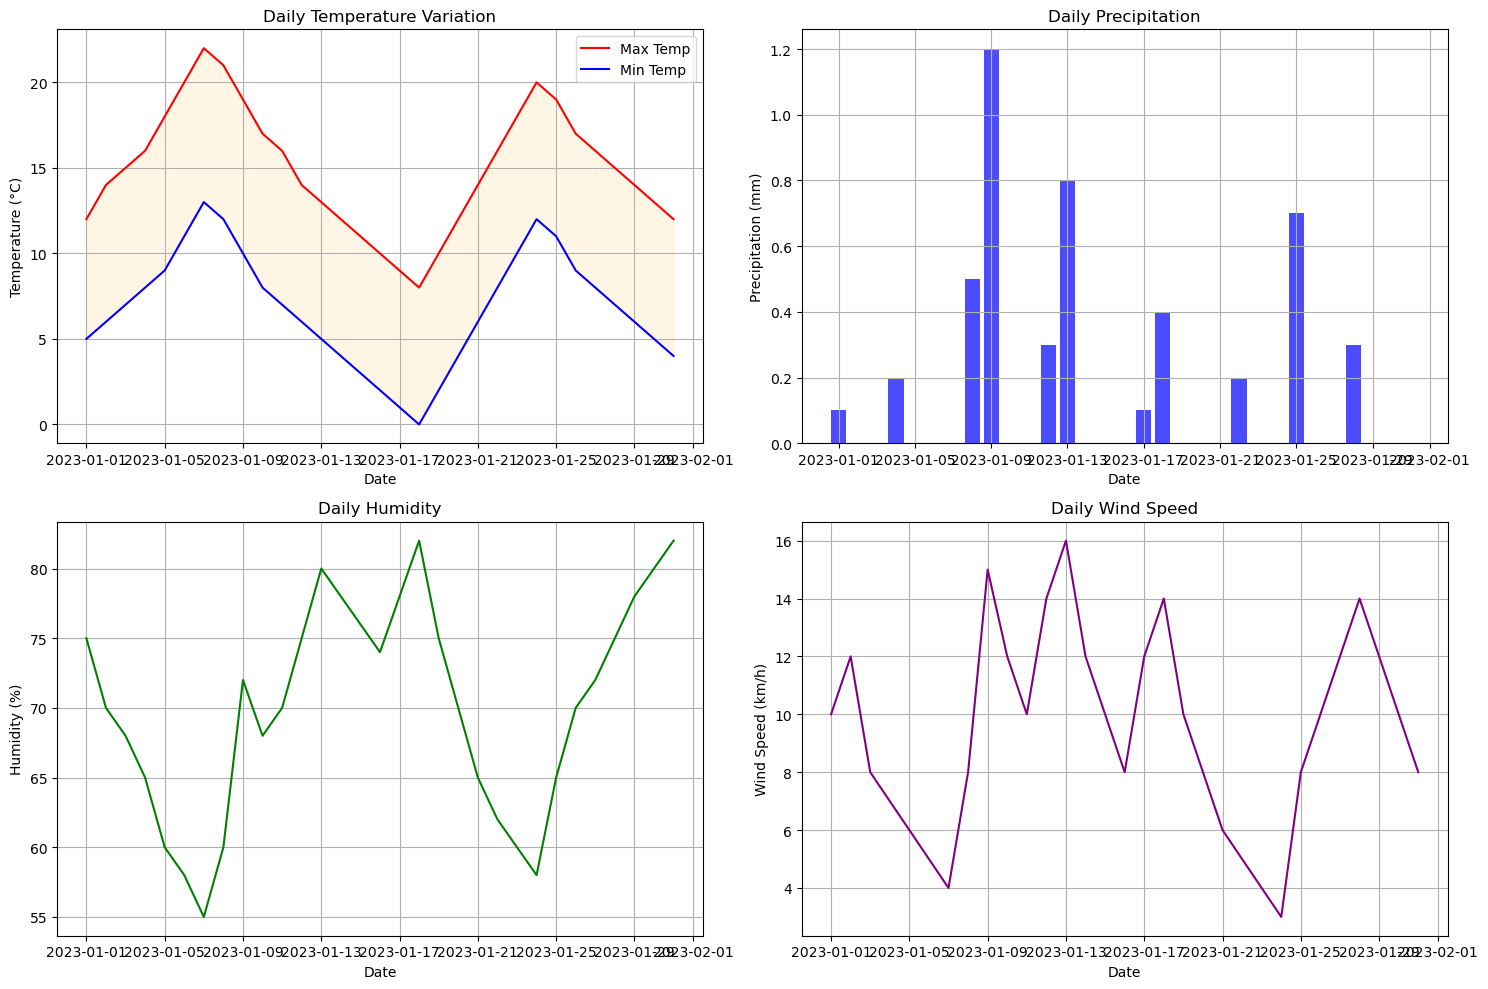


=== Correlation Matrix ===
               max_temp  min_temp  precipitation  humidity  wind_speed
max_temp       1.000000  0.993581       0.180889 -0.824318   -0.464029
min_temp       0.993581  1.000000       0.172266 -0.821573   -0.481564
precipitation  0.180889  0.172266       1.000000  0.111035    0.453095
humidity      -0.824318 -0.821573       0.111035  1.000000    0.771156
wind_speed    -0.464029 -0.481564       0.453095  0.771156    1.000000


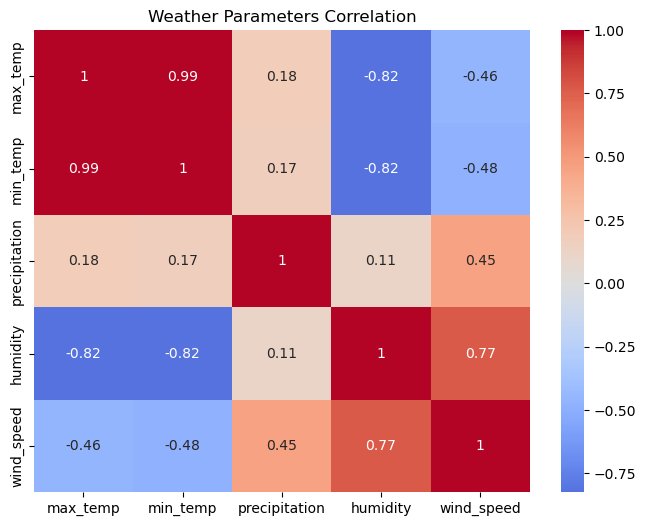


=== Rainy Days (Precipitation > 0.5mm) ===
            precipitation  humidity  wind_speed
date                                           
2023-01-09            1.2        72          15
2023-01-13            0.8        80          16
2023-01-25            0.7        65           8

=== Days with Highest Temperature Range ===
            max_temp  min_temp  temp_range
date                                      
2023-01-05        18         9           9
2023-01-06        20        11           9
2023-01-07        22        13           9
2023-01-08        21        12           9
2023-01-09        19        10           9


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'date': pd.date_range(start='2023-01-01', end='2023-01-31'),
    'max_temp': [12, 14, 15, 16, 18, 20, 22, 21, 19, 17, 16, 14, 13, 12, 11, 10, 9, 8, 10, 12, 14, 16, 18, 20, 19, 17, 16, 15, 14, 13, 12],
    'min_temp': [5, 6, 7, 8, 9, 11, 13, 12, 10, 8, 7, 6, 5, 4, 3, 2, 1, 0, 2, 4, 6, 8, 10, 12, 11, 9, 8, 7, 6, 5, 4],
    'precipitation': [0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.5, 1.2, 0.0, 0.0, 0.3, 0.8, 0.0, 0.0, 0.0, 0.1, 0.4, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.7, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0],
    'humidity': [75, 70, 68, 65, 60, 58, 55, 60, 72, 68, 70, 75, 80, 78, 76, 74, 78, 82, 75, 70, 65, 62, 60, 58, 65, 70, 72, 75, 78, 80, 82],
    'wind_speed': [10, 12, 8, 7, 6, 5, 4, 8, 15, 12, 10, 14, 16, 12, 10, 8, 12, 14, 10, 8, 6, 5, 4, 3, 8, 10, 12, 14, 12, 10, 8]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Basic analysis
print("=== Basic Dataset Info ===")
print(df.info())

print("\n=== Descriptive Statistics ===")
print(df.describe())

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.plot(df.index, df['max_temp'], label='Max Temp', color='red')
plt.plot(df.index, df['min_temp'], label='Min Temp', color='blue')
plt.fill_between(df.index, df['min_temp'], df['max_temp'], color='orange', alpha=0.1)
plt.title('Daily Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.bar(df.index, df['precipitation'], color='blue', alpha=0.7)
plt.title('Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(df.index, df['humidity'], color='green')
plt.title('Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(df.index, df['wind_speed'], color='purple')
plt.title('Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)

plt.tight_layout()
plt.show()


print("\n=== Correlation Matrix ===")
corr_matrix = df.corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Weather Parameters Correlation')
plt.show()


rainy_days = df[df['precipitation'] > 0.5]
print("\n=== Rainy Days (Precipitation > 0.5mm) ===")
print(rainy_days[['precipitation', 'humidity', 'wind_speed']])


df['temp_range'] = df['max_temp'] - df['min_temp']
print("\n=== Days with Highest Temperature Range ===")
print(df.nlargest(5, 'temp_range')[['max_temp', 'min_temp', 'temp_range']])